## Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

First, we should call data sets from splitting sections.

In [2]:
%store -r X_train
X_train = X_train

%store -r y_train
y_train = y_train

%store -r X_val
X_val = X_val

%store -r y_val
y_val = y_val

%store -r X_test
X_test = X_test

%store -r y_test
y_test = y_test

In this next section, based on each model, we define specific pipeline and buid and train model.

In [3]:
def evaluate_model(X_train, y_train, X_val, y_val, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    cross_val_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    cross_val_rmse = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    print(f'Training CV R²: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}')

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

    print(f'Training R²: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}')
    print(f'Validation R²: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}')

## Model Training

### Linear Regression

In [4]:
model = Pipeline([
    ('scaler', StandardScaler()), # This algorithm needs scaling
    ('lin_reg', LinearRegression())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9991, Training CV RMSE: 95.2011
Training R²: 0.9991, Training RMSE: 95.8568
Validation R²: 0.9996, Validation RMSE: 63.3000


This model is not underfit (both CV and Validation are high) and overfit (CV and Validation are close to each other).

### Decision Tree Regressor

In [5]:
model = Pipeline([
    ('DecisionTree_reg', DecisionTreeRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.8928, Training CV RMSE: 1023.3431
Training R²: 1.0000, Training RMSE: 0.0000
Validation R²: 0.8973, Validation RMSE: 995.8456


This model is overfit (CV train and train have gap). But, since the gap between CV train and Validation is small, that overfitting is not severe.

### Random Forest Regressor

In [6]:
model = Pipeline([
    ('RandomForest_reg', RandomForestRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9596, Training CV RMSE: 629.2977
Training R²: 0.9950, Training RMSE: 221.7723
Validation R²: 0.9627, Validation RMSE: 600.2156


### Support Vector Regression

In [7]:
model = Pipeline([
    ('scaler', StandardScaler()), # Scaling the features
    ('svr', SVR(kernel='rbf'))
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.0685, Training CV RMSE: 3027.3353
Training R²: 0.0862, Training RMSE: 2999.4412
Validation R²: 0.0855, Validation RMSE: 2971.9019


### XGBoost Regressor

In [8]:
model = Pipeline([
    ('scaler', StandardScaler()), # Scaling the features
    ('xgb', XGBRegressor(objective='reg:squarederror'))
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9920, Training CV RMSE: 280.2197
Training R²: 0.9986, Training RMSE: 116.9903
Validation R²: 0.9928, Validation RMSE: 264.4133


This model is not underfit (both CV and Validation are high) and overfit (CV and Validation are close to each other).

### CatBoost Regressor

In [9]:
model = Pipeline([
    ('catboost', CatBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Learning rate set to 0.052996
0:	learn: 3002.5386655	total: 169ms	remaining: 2m 48s
1:	learn: 2890.4135878	total: 173ms	remaining: 1m 26s
2:	learn: 2774.6653173	total: 178ms	remaining: 59s
3:	learn: 2665.5842386	total: 182ms	remaining: 45.3s
4:	learn: 2567.5958915	total: 188ms	remaining: 37.5s
5:	learn: 2469.5098712	total: 194ms	remaining: 32.1s
6:	learn: 2376.9738903	total: 198ms	remaining: 28.1s
7:	learn: 2297.0043203	total: 202ms	remaining: 25.1s
8:	learn: 2215.1927629	total: 207ms	remaining: 22.8s
9:	learn: 2139.8163751	total: 212ms	remaining: 21s
10:	learn: 2063.5877621	total: 217ms	remaining: 19.5s
11:	learn: 1992.1604502	total: 235ms	remaining: 19.4s
12:	learn: 1923.5305228	total: 240ms	remaining: 18.2s
13:	learn: 1858.1751387	total: 245ms	remaining: 17.3s
14:	learn: 1799.7401392	total: 252ms	remaining: 16.5s
15:	learn: 1743.3864607	total: 256ms	remaining: 15.8s
16:	learn: 1686.5267358	total: 261ms	remaining: 15.1s
17:	learn: 1628.8700788	total: 266ms	remaining: 14.5s
18:	learn:

The model is not underfit (both CV and Validation are high) and overfit (CV and Validation are close to each other).

### AdaBoost Regressor

In [10]:
model = Pipeline([
    ('adaboost', AdaBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.8861, Training CV RMSE: 1063.6046
Training R²: 0.8899, Training RMSE: 1041.0989
Validation R²: 0.8830, Validation RMSE: 1062.7904


The model is not underfit (both CV and Validation are high) and overfit (CV and Validation are close to each other).

## Model Selection

Based on the result of default model training, the best model is CatBoost with R2 0.999 and RMSE 50.

In [11]:
best_model = CatBoostRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = -cross_val_score(best_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
print(f'Training CV R²: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}')

best_model.fit(X_train, y_train)

y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f'Training R²: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}')
print(f'Validation R²: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}')

Learning rate set to 0.052996
0:	learn: 3002.5386655	total: 6.03ms	remaining: 6.03s
1:	learn: 2890.4135878	total: 11.1ms	remaining: 5.53s
2:	learn: 2774.6653173	total: 18ms	remaining: 6s
3:	learn: 2665.5842386	total: 23.2ms	remaining: 5.77s
4:	learn: 2567.5958915	total: 28.5ms	remaining: 5.67s
5:	learn: 2469.5098712	total: 33.4ms	remaining: 5.54s
6:	learn: 2376.9738903	total: 38.3ms	remaining: 5.44s
7:	learn: 2297.0043203	total: 43.3ms	remaining: 5.37s
8:	learn: 2215.1927629	total: 48.2ms	remaining: 5.31s
9:	learn: 2139.8163751	total: 54.7ms	remaining: 5.41s
10:	learn: 2063.5877621	total: 60ms	remaining: 5.39s
11:	learn: 1992.1604502	total: 67.6ms	remaining: 5.57s
12:	learn: 1923.5305228	total: 73.9ms	remaining: 5.61s
13:	learn: 1858.1751387	total: 81.8ms	remaining: 5.76s
14:	learn: 1799.7401392	total: 89.4ms	remaining: 5.87s
15:	learn: 1743.3864607	total: 97.1ms	remaining: 5.97s
16:	learn: 1686.5267358	total: 102ms	remaining: 5.87s
17:	learn: 1628.8700788	total: 106ms	remaining: 5.76s

## Tune Model with Hyper-Parameter

Now, in this section, we try to tune model and improve its performance.

In [12]:
param_grid = {
    'iterations': [100, 200], # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1], #Step size at each iteration
    'depth': [4, 6, 8], # Depth of the trees
    'l2_leaf_reg': [1, 3, 5], # L2 regularization coefficient
    'border_count': [32, 64], # Number of splits in categorical features
}

grid_search = GridSearchCV(estimator=best_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
print('Best parameters found: ', grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
0:	learn: 2891.2346180	total: 7.67ms	remaining: 1.53s
1:	learn: 2668.8933077	total: 13.7ms	remaining: 1.36s
2:	learn: 2459.9756447	total: 20.1ms	remaining: 1.32s
3:	learn: 2268.0262502	total: 26.2ms	remaining: 1.28s
4:	learn: 2101.5786230	total: 32.2ms	remaining: 1.26s
5:	learn: 1943.3093160	total: 38.1ms	remaining: 1.23s
6:	learn: 1792.1020532	total: 44.9ms	remaining: 1.24s
7:	learn: 1653.1111994	total: 50.9ms	remaining: 1.22s
8:	learn: 1527.1311250	total: 57.5ms	remaining: 1.22s
9:	learn: 1428.5181867	total: 63.3ms	remaining: 1.2s
10:	learn: 1325.7906953	total: 67.9ms	remaining: 1.17s
11:	learn: 1225.5528466	total: 72.5ms	remaining: 1.14s
12:	learn: 1145.1798397	total: 78.6ms	remaining: 1.13s
13:	learn: 1070.7260044	total: 83.5ms	remaining: 1.11s
14:	learn: 998.3574971	total: 88.4ms	remaining: 1.09s
15:	learn: 936.2662415	total: 93.3ms	remaining: 1.07s
16:	learn: 872.7640039	total: 98.1ms	remaining: 1.06s
17:	learn: 823.0

In [14]:
best_model_tuned = grid_search.best_estimator_
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(best_model_tuned, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = -cross_val_score(best_model_tuned, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
print(f'Training CV R²: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}')

best_model_tuned.fit(X_train, y_train)

y_train_pred = best_model_tuned.predict(X_train)
y_val_pred = best_model_tuned.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f'Training R²: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}')
print(f'Validation R²: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}')

0:	learn: 2888.9038597	total: 7.23ms	remaining: 1.44s
1:	learn: 2666.6848766	total: 15.9ms	remaining: 1.57s
2:	learn: 2457.7945036	total: 22.3ms	remaining: 1.46s
3:	learn: 2264.0649998	total: 29ms	remaining: 1.42s
4:	learn: 2107.1511769	total: 47.5ms	remaining: 1.85s
5:	learn: 1947.7858787	total: 58.1ms	remaining: 1.88s
6:	learn: 1803.5933289	total: 62.4ms	remaining: 1.72s
7:	learn: 1673.0132176	total: 68.3ms	remaining: 1.64s
8:	learn: 1547.1883950	total: 73.7ms	remaining: 1.56s
9:	learn: 1451.4864379	total: 78.1ms	remaining: 1.48s
10:	learn: 1341.2997862	total: 82.8ms	remaining: 1.42s
11:	learn: 1249.0347090	total: 87ms	remaining: 1.36s
12:	learn: 1168.6492901	total: 91.1ms	remaining: 1.31s
13:	learn: 1084.4820003	total: 95.9ms	remaining: 1.27s
14:	learn: 1011.2906088	total: 100ms	remaining: 1.23s
15:	learn: 937.0832152	total: 104ms	remaining: 1.2s
16:	learn: 873.2688874	total: 108ms	remaining: 1.17s
17:	learn: 818.7546156	total: 113ms	remaining: 1.14s
18:	learn: 763.6390680	total: 11

Since, the tuned model is not better than default parameter, we consider default model as the final model.

In [15]:
final_model = best_model

## Final Evaluation of Model

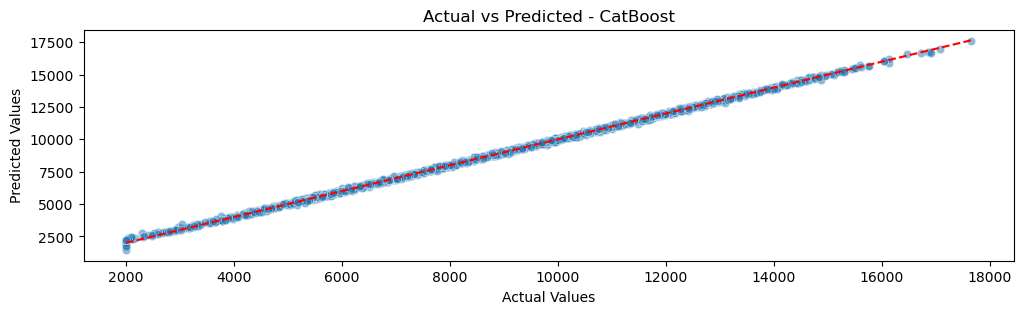

In [16]:
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(12, 3))

sns.scatterplot(x=y_val,
                y=y_val_pred,
                alpha=0.5)

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - CatBoost')
plt.show()

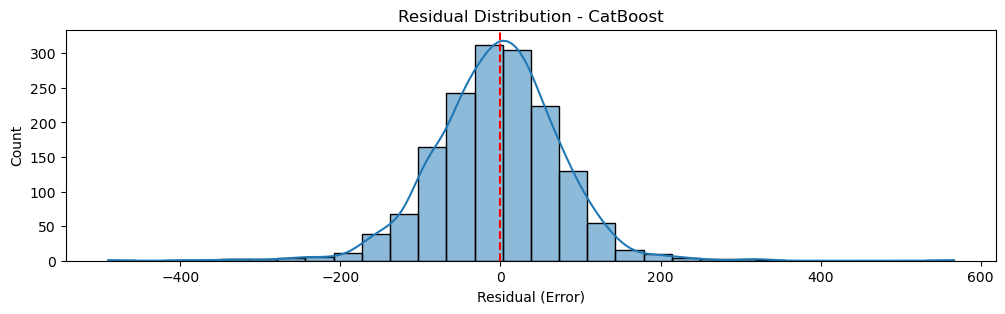

In [17]:
# Residual Plot (Errors)
residuals = y_val - y_val_pred

plt.figure(figsize=(12, 3))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel('Residual (Error)')
plt.title('Residual Distribution - CatBoost')
plt.show()

## Apply Model on Test Data

Here, that we are happy with model of the project, we can predict the price on test data.

In [19]:
with open('C:/Users/user/Documents/DATA SCIENCE/Projects/CAR PRICE PREDICTION/models/Brand_Encoder.pkl', 'rb') as f:
    brand_encoder = pickle.load(f) #Brand

with open('C:/Users/user/Documents/DATA SCIENCE/Projects/CAR PRICE PREDICTION/models/Model_Encoder.pkl', 'rb') as f:
    model_encoder = pickle.load(f) #Model

with open('C:/Users/user/Documents/DATA SCIENCE/Projects/CAR PRICE PREDICTION/models/OneHot_Encoder.pkl', 'rb') as f:
    onehot_encoder = pickle.load(f) #Fuel, #Transmission

In the next step, we should encode categorical features

In [20]:
# Encoding Brand and Model
X_test['Encoded_Brand'] = X_test['Brand'].map(brand_encoder)
X_test['Encoded_Model'] = X_test['Model'].map(model_encoder)
X_test['Encoded_Brand'].fillna(X_test['Encoded_Brand'].mean(), inplace=True)
X_test['Encoded_Model'].fillna(X_test['Encoded_Model'].mean(), inplace=True)
X_test.drop(['Brand', 'Model'], axis=1, inplace=True)

#Encoding Fuel and Transmission
categorical_cols = ['Fuel', 'Transmission']
encoded_array_test = onehot_encoder.transform(X_test[categorical_cols])
encoded_df_test = pd.DataFrame(encoded_array_test, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Merge encoded columns with test data
X_test_encoded = X_test.drop(columns=categorical_cols).reset_index(drop=True)
X_test = pd.concat([X_test_encoded, encoded_df_test], axis=1)

Now we can predict test data.

In [21]:
y_test_pred = final_model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Test R²: {r2_test:.4f}, Test RMSE: {rmse_test:.4f}')

Test R²: 0.9997, Test RMSE: 48.9199


The result shows model is good generalized and there is no overfitting/underfitting.

## CHECKPOINT

In [23]:
pickle.dump(final_model, open('C:/Users/user/Documents/DATA SCIENCE/Projects/CAR PRICE PREDICTION/models/Model.pkl', 'wb'))